In [3]:
import numpy as np
import glob
import matplotlib.pyplot as plt 
from matplotlib.patches import Rectangle
from PIL import Image

'''
helper functions to display images
'''


def show_image(img): 
    shape = img.shape
    if len(shape) == 3: 
        num_channels = shape[-1]
        assert num_channels==3, "RGB image must have 3 channels."
    elif len(shape) == 2: 
        num_channels = 1
    
    fig = plt.figure()
    if num_channels == 3: 
        plt.imshow(img.astype(np.uint8), vmin=0., vmax=255.)
    else: 
        plt.imshow(img.astype(np.uint8), vmin=0., vmax=255., cmap='gray')

    plt.show()
    plt.close()

def show_filter(f): 
    fig = plt.figure()
    plt.imshow(f, vmin=0, vmax=1, cmap='gray')
    plt.show()
    plt.close()

def show_channels(img): 
    num_channels = 3
    titles = ['red', 'green', 'blue']
    fig = plt.figure()
    
    for i in range(num_channels): 
        plt.subplot(1, num_channels, i+1)
        plt.imshow(img.astype(np.uint8)[:, :, i], vmin=0., vmax=255., cmap='gray')
        plt.title(titles[i])
        plt.xticks([])
        plt.yticks([])
    plt.show()
    plt.close()
    


# What is an image? 
## Greyscale Images
First let's talk about greyscale images, like the one below: 
<img src="./notebook1_images/markdown/grey_image.png" width='200'>

Computers can't see images like we do. Instead, digital images like the ones you see on your computer screen are represented by an array of numbers. Each cell of the array is called a *pixel*, each of which is a little square. 
<img src="./notebook1_images/markdown/grey_pixels.png" width='400'>

Each pixel can have a value of 0 to 255. If a pixel has a value of 0, the pixel is black. If it is 255, it is white. Any value between 0 and 255 is grey, with a value such as 50 being dark grey and 200 being light grey. The smiley face image can be represented as a pixel image like so: 
<img src="./notebook1_images/markdown/grey_pixels1.png" width='400'>

Computers will process images only as pixel arrays. They see only arrays of numbers, not images as we see them. 
<img src="./notebook1_images/markdown/grey_pixels2.png" width='600'>

The size of images is described by their width and height. *Width* is the number of columns in the pixel array. *Height* is the number of rows. We often describe images sizes as "height x width". 
<img src="./notebook1_images/markdown/height_width_pixels.png" width='200'>
*What is the height and width of the image above?* We would say this is "6 x 8". 

That was only a simple image, but the same array of pixels can be used to represent very complex images as well, such as the pineapple below:
<img src="./notebook1_images/markdown/grey_pineapple.png" width='150'>

Images like the pineapple above don't look like they're made up of little squares because they are made of up of thousands or millions of very small pixels. The pineapple has a height of 2000 pixels and width of 700 pixels. If we zoom in very closely to a small 25x25 box, however, the pixels are clearly visible: 
<img src="./notebook1_images/markdown/grey_pineapple_zoom.png" width='300'>
*What value do you think the pixel marked in purple has in the image above?*


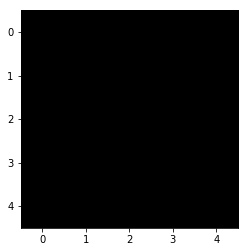

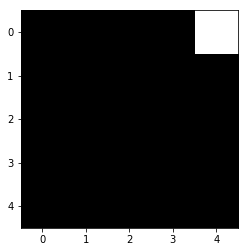

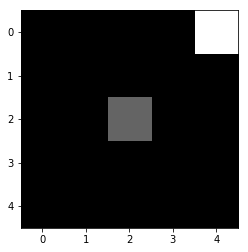

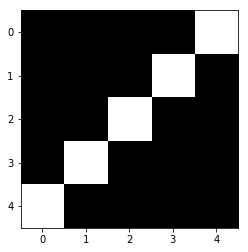

In [75]:
'''
manipulating arrays
'''
h=5
w=5
canvas = np.zeros([h, w])
show_image(canvas)

# draw a white pixel in the upper left hand corner
canvas[0, 4] = 255
show_image(canvas)

# draw a grey pixel in the middle
canvas[2, 2] = 100
show_image(canvas)

# make all the diagonal pixels (from upper right to lower left) white 
for i in range(h): 
    canvas[i, h-i-1] = 255
show_image(canvas)


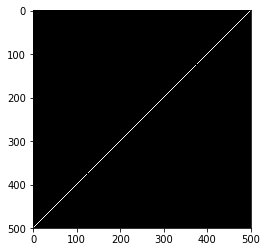

In [79]:
'''
draw the same diagonal line, but for a large canvas
'''
h = 500
w = 500
canvas = np.zeros([h, w])
for i in range(h): 
    canvas[i, h-i-1] = 255
show_image(canvas)



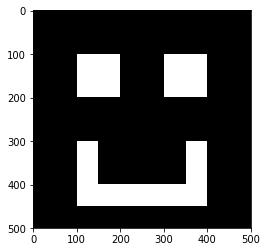

In [88]:
'''
draw a smiley face
'''
h = 500
w = 500
canvas = np.zeros([h, w])


# left eye
canvas[100:200, 100:200] = 255

# right eye
canvas[100:200, 300:400] = 255

# smiley face
canvas[300:400, 100:150] = 255
canvas[300:400, 350:400] = 255
canvas[400:450, 100:400] = 255

show_image(canvas)



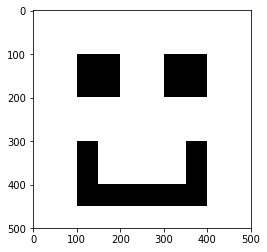

In [89]:
'''
invert the smiley face
'''
h = 500
w = 500
canvas = np.zeros([h, w])
canvas[:, :] = 255


# left eye
canvas[100:200, 100:200] = 0

# right eye
canvas[100:200, 300:400] = 0

# smiley face
canvas[300:400, 100:150] = 0
canvas[300:400, 350:400] = 0
canvas[400:450, 100:400] = 0

show_image(canvas)



## Color Images
Now let's talk about color images. Color images are represented by the same pixel arrays as greyscale images. The difference is this: greyscale images are a single array of height x width, or size = height x width x 1. Color images are represented by 3 of these arrays, size = height x width x 3. Each of these three arrays represents a color channel: red, green, and blue. Through different combinations of these three colors, we can create any other color. 
<img src="./notebook1_images/markdown/colorwheel.png" width='300'>

The pixel values work in the same way as for grey scale images, except it represents how much of a color present. For example, for a pixel in the red channel, if a pixel has a value of 0 it is black, but if it is 255 it has full red color. A value in between (like 100) would be a darker red color. The same is true for the green and blue channels. Then the color of the pixel in the image is determined by the color of the pixels in each of the RGB channels. This represents how much red, how much green, and how much blue is "mixed" together for the resulting color as shown in the color wheel above. 

For a fully green pixel, we would have 0 in the red channel, 255 in the green channel, and 0 in the blue channel. For a white pixel, for example, we would have 255 in all three color channels. Some more examples are shown below: 
<img src="./notebook1_images/markdown/rgb_wheel.png" width='400'>

This is how real images are represented by computers. For the same pineapple as before but in color, we can see the pixel array values for some pixels highlighted in purple: 
<img src="./notebook1_images/markdown/rgb_pineapple.png" width='400'>

We will play more with RGB channels in the exercises below. 

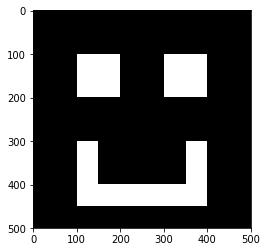

In [4]:
'''
make the same smiley face, but using 3 channels instead of 1
'''
h = 500
w = 500
canvas = np.zeros([h, w, 3])


# left eye
canvas[100:200, 100:200, :] = 255

# right eye
canvas[100:200, 300:400, :] = 255

# smiley face
canvas[300:400, 100:150, :] = 255
canvas[300:400, 350:400, :] = 255
canvas[400:450, 100:400, :] = 255

show_image(canvas)

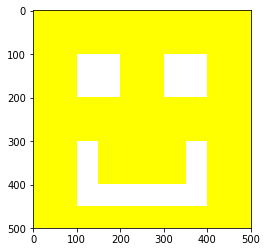

In [6]:
'''
make the face yellow
'''

canvas_rgb = np.zeros([h, w, 3])
canvas_rgb[:, :, 0] = 255
canvas_rgb[:, :, 1] = 255
canvas_rgb[:, :, 2] = canvas[:, :, 2]
show_image(canvas_rgb)



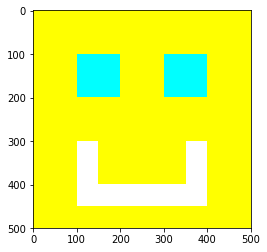

"\nkeep playing around with this colors if you'd like!\n"

In [12]:
'''
and turn the eyes cyan! 
'''
# left eye
canvas_rgb[100:200, 100:200, 0] = 0
canvas_rgb[100:200, 100:200, 2] = 255
# right eye
canvas_rgb[100:200, 300:400, 0] = 0
canvas_rgb[100:200, 300:400, 2] = 255

show_image(canvas_rgb)

'''
keep playing around with these colors if you'd like!
'''

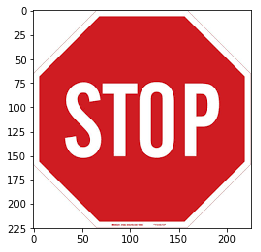

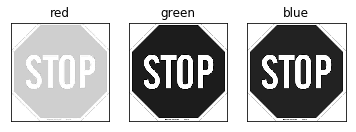

In [158]:
'''
load real image
visualize real image
'''
im_path = './notebook1_images/stopsign.png'
im = Image.open(im_path).convert('RGB')
im_arr = np.array(im)
height, width, num_channels = im_arr.shape

show_image(im_arr)

'''
visualize each channel to see how much of each pixel value is there
'''
show_channels(im_arr)


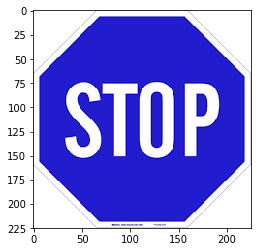

In [33]:
'''
turn the image blue
'''

swapped_im_arr = np.zeros([height, width, num_channels])
swapped_im_arr[:, :, 0] = im_arr[:, :, 2]
swapped_im_arr[:, :, 1] = im_arr[:, :, 1]
swapped_im_arr[:, :, 2] = im_arr[:, :, 0]
show_image(swapped_im_arr)


In [ ]:
'''
make the image greyscale
'''
grey_im_arr = np.zeros([heig])


# Convolution 
Besides just changing the color of an image, we can do more complicated transformations, such as the ones below: 
<img src="./notebook1_images/markdown/convolution_examples.png" width='300'>
All of the images above were created by something called *convolution*. 

Convolution is a mathematical operation used to transform images. It is executed by taking a small filter and sliding it over the image. The filter looks at a small window of of the image, then calculates a weighted sum of the pixels inside the window. This is then used to create a new pixel. After doing this operation over the entire image, convolution is able to create a new image.  
<img src="./notebook1_images/markdown/convolution .gif" width='300'>
The original image is the 5x5 blue array in the picture above. The filter is the 3x3 shadow sliding over the image. The new array calculated from the filter is the 5x5 green array. 

Let's go through a small toy example. We'll try to blur an image horizontally. We'll try convolution on this toy image/pixel array: 
<img src="./notebook1_images/markdown/toy_image.png" width='100'>

Next let's think about how to design our filter. A filter is also a small array of pixels, just smaller than the image itself. In order to blur an image horizontally, we want pixels to blur together along the horizontal axis. How can we do that? We can try to take the average of pixels that are next to each other. Then we'd have a filter that looks like thsi:
<img src="./notebook1_images/markdown/toy_filter.png" width='100'>

Now let's see how convolution is done. We will slide this filter from left to right, then top to bottom, along our image. The result will be an output image that is transformed from the original. 
<img src="./notebook1_images/markdown/conv0.png" width='400'>

First, we place it at the starting point which is the upper left corner of the image, like so: 
<img src="./notebook1_images/markdown/conv1.png" width='200'>
Notice that part if the filter is off the image. This is to make sure that the output image is the same size as the original image. If part of the filter is off the image, we can just ignore that part of the filter or consider the image to be "padded" by 0 values which the filter ignores.

This is the key part of convolution. To calculate the value of the new pixel, we multiply each value in the filter by the value on the image which it overlaps with: 
<img src="./notebook1_images/markdown/conv2.png" width='400'>

We then add the result together. The result is the value of the pixel in the output image. 
<img src="./notebook1_images/markdown/conv3.png" width='400'>

And that was the convolution calculation for one pixel! Next, we move the filter right by one pixel and do the same calculation. 
<img src="./notebook1_images/markdown/conv4.png" width='400'>

Keep moving it right until we have calculated the pixel values for the first row of the output image. 
<img src="./notebook1_images/markdown/conv5.png" width='400'>

Now we have to move on to the next row. Then we move the filter back to the left side of the image, but down by one pixel. 
<img src="./notebook1_images/markdown/conv6.png" width='400'>
And do the convolution operation again! 
<img src="./notebook1_images/markdown/conv7.png" width='400'>

Just as before, finish the row. 
<img src="./notebook1_images/markdown/conv8.png" width='400'>

Then move it down one row. 
<img src="./notebook1_images/markdown/conv9.png" width='400'>

Finish one more row like this. 
<img src="./notebook1_images/markdown/conv10.png" width='400'>

Until we've filled up all the new pixel values for the output image!
<img src="./notebook1_images/markdown/conv11.png" width='400'>

Now we've finished what we've set out to do: 
<img src="./notebook1_images/markdown/conv12.png" width='400'>

If we do this for a real image, we get the same result. You can see that the resulting image is a blurred version in the horizontal direction of our original. 
<img src="./notebook1_images/markdown/conv_fruit.png" width='400'>

*How would we design a filter for vertical blurring? What about blurring in both directions? *

There are some tricks to making convolution work for real examples. The first is that the size of the input and output images must be the same. The solution is one that we talked about earlier. To make the sizes work out, we "pad" the real image with 0 values which the filter effectively ignores during multiplication, as we've shown before. 

The second is that pixel values can only take values between 0 and 1 or 0 and 255, but after convolution, some of are values may be greater than 1. So, we need to rescale the pixel values in our output so that they are between 0 and 1 again. We can do this by finding the maximum pixel value in the output, then dividing every pixel by this max value. This makes it so that the new maximum value is again 1. 
<img src="./notebook1_images/markdown/rescale.png" width='400'>


*We've only shown convolution for a greyscale image, but what if we wanted to perform convolution on a color image (which has 3 channels instead of 1)? What do you think? *




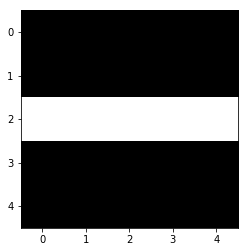

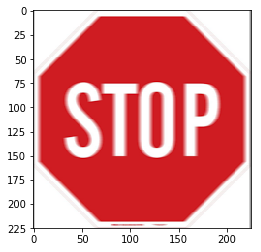

In [120]:
'''
horizontal blur filter
'''

def pad_image(im_arr, filter_height, filter_width): 
    
    buffer_height = (filter_height - 1) / 2
    buffer_width = (filter_width - 1) / 2

    im_height, im_width, num_channels = im_arr.shape
    image = np.zeros([im_height + buffer_height * 2, im_width + buffer_width * 2, num_channels])
    image[buffer_height:-buffer_height, buffer_width:-buffer_width] = im_arr
    
    return image

def convolve_image(f, im_arr): 
    im_height, im_width, num_channel = im_arr.shape
    filter_height, filter_width = f.shape
    image = pad_image(im_arr, filter_height, filter_width)
    
    convolution = np.zeros([im_height, im_width, num_channels])
    
    for i in range(im_height): 
        for j in range(im_width): 
            for k in range(num_channel): 
                window = image[i:(i+filter_height), j:(j+filter_width), k] 
                convolution[i, j, k] = np.sum(np.multiply(window, f))
                
    return convolution
    
    

filter_height = 5
filter_width = 5
f = np.zeros([filter_height, filter_width])
f[2, :] = 1. 
f = f / filter_height 
show_filter(f)

convolution = convolve_image(f, im_arr)
show_image(convolution)



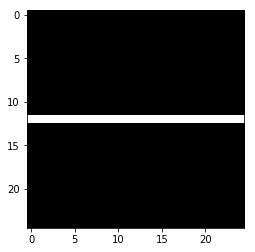

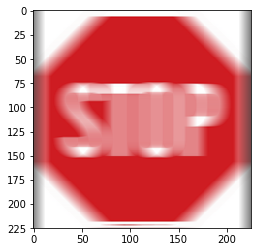

In [122]:
'''
more horizontal blurring
'''
filter_height = 25
filter_width = 25
f = np.zeros([filter_height, filter_width])
f[12, :] = 1. 
f = f / filter_height
show_filter(f)

convolution = convolve_image(f, im_arr)
show_image(convolution)

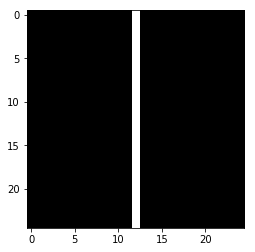

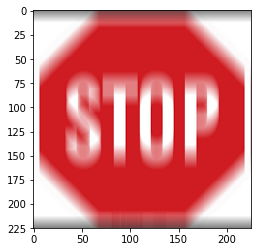

In [123]:
'''
vertical blurring
'''
filter_height = 25
filter_width = 25
f = np.zeros([filter_height, filter_width])
f[:, 12] = 1. 
f = f / filter_height
show_filter(f)

convolution = convolve_image(f, im_arr)
show_image(convolution)

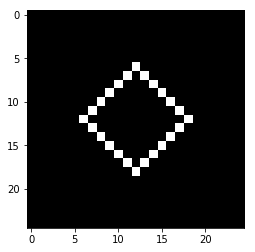

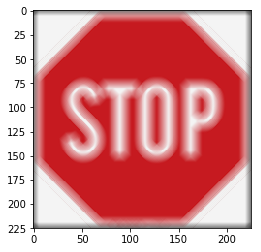

In [159]:
'''
try a filter of your own
'''
filter_height = 25
filter_width = 25
f = np.zeros([filter_height, filter_width])

for i in range(7): 
    f[12-i, 6+i] = 1. 
    f[12+i, 6+i] = 1. 
    f[18-i, 12+i] = 1.
    f[6+i, 12+i] = 1.
f = f / filter_height
show_filter(f)

convolution = convolve_image(f, im_arr)
show_image(convolution)

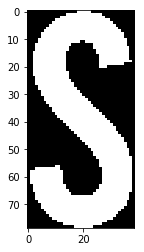

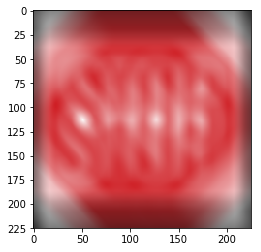

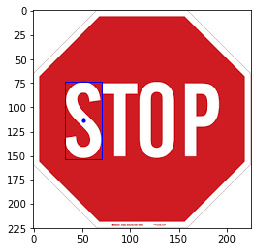

In [192]:
'''
convolution for object identification
'''
f = im_arr[74:153, 32:71, 1].astype(np.float32) / 255. 
f = np.round(f)
show_filter(f)
f = f / float(np.sum(f))
filter_height, filter_width = f.shape

convolution = convolve_image(f, im_arr)
show_image(convolution)

# find where the convolution has max value; this is the center of object
max_value = np.max(convolution)
max_index = np.where(convolution == max_value)
index = [max_index[0][0], max_index[1][0], max_index[2][0]]

# plot where you identified the object to be
fig,ax = plt.subplots(1)
ax.imshow(im_arr)
ax.scatter(index[1], index[0], c='b', s=10)
rect = Rectangle((index[1] - filter_width/2, index[0] - filter_height/2), \
          filter_width, filter_height, fill=False, edgecolor='blue')
ax.add_patch(rect)
plt.show()
plt.close()

(145, 960, 1280, 3)


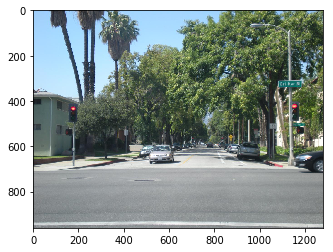

In [107]:
'''
identify traffic lights 
'''
dataset_path = './notebook1_images/tf_dataset/'  
image_list = []
for filename in glob.glob(dataset_path + '*.jpg'):
    im=Image.open(filename).convert('RGB')
    image_list.append(np.array(im).astype(np.uint8))

example_image = image_list[0]
num_images = len(image_list)
height, width, num_channels = example_image.shape
print(num_images, height, width, num_channels)
show_image(example_image)

In [ ]:
'''
stuff about thresholding, precision and recall
what are the difficulties/disadvantages of this method?
'''